<a href="https://colab.research.google.com/github/mitadrubanerjee/MyProjects/blob/main/Copy_of_21238068_MitadruBanerjeeChowdhury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing Regression Algorithm to predict the housing prices

##Problem Statement


I will train two different regression models and prepare a short report. This report will describe the methodology followed, and analyse the performance of the models that were trained.


1)Select an appropriate ML package to use for this regression task. Your report should briefly introduce your chosen package and your reasons for selecting it. [2 marks max.]

2)Document any steps which you followed to prepare the data for input into the ML package [1 mark max.]

3)In the ML package, select two different regression algorithms that you will apply to the dataset to learn two different regression models. Here are some possible choices, though other appropriate algorithms are fine too: linear regression, multi-layer perceptron, decision trees, k-nearest neighbours, support vector machines, etc. In your report, include a brief, clear description of both algorithms. Ensure that you acknowledge all of your sources of information. [2x2 = 4 marks max.]

4)Describe the process you followed while developing each model. Be sure to include and justify final the values selected for all parameter settings, and describe the process you followed while searching through possible parameter settings. Describe each of the models, using graphics if appropriate. [2x3 = 6 marks max]

5)Discuss how you divided the dataset into test/training sets and monitored for possible overfitting or underfitting. [3 marks max.]
Evaluate the performance of the two regression models using appropriate metrics (e.g., RMSE, MAE, R, R2 etc.). 

6)Discuss whether the two models give very similar or significantly different results, and why. [4 marks max.]
The dataset for this assignment in a file called "galway_rentals.txt". Columns are separated by tabs and rows are separated by newlines. Each row describes one individual instance in the dataset. The attributes are in columns in the following order: 

price_per_month, distance_eyre_square, distance_salthill , distance_nuig, distance_gmit, num_bedrooms, num_bathrooms, type, ber, balcony, floor, heating
The goal of this regression task is to predict price_per_month based on the values of the other attributes.

Your report should not exceed four A4 pages in total. Therefore, take care to ensure that it is succinct and informative, and not overly superficial. This is an individual assignment. As you are all postgraduate students, we will treat any plagiarism (from another student or other sources) very seriously.
You must submit your report as a single PDF file in Blackboard, on or before the due date. Ensure your name, class and student ID are on it.Your assignment will be marked out of 20, with the breakdown shown above. If any aspect of your work is plagiarised or is otherwise dishonest, you will receive 0 for the full assignment.



In this notebook I have detailed the code and my approach that I have followed throughout the process. In the accompanying Report I have detailed my thought process and have provided a more desriptive answer to the questions as listed above.  

I am working with the sklearn ML Package for this Assignment. 
I have divided the code in the following parts:

Machine Learning Pipeline:

1)Data Loading, Data Preparation and Exploratory Data Analysis

2)Encoding of Categorical data 

3)Data Splitting

4)Model 1

5)Model 2

6)Evaluation of Models




In [ ]:
#Machine Learning Pipeline (1)

#Loading Data Set
#Loading the galway_rentals data set into Collab.

#Importing the packages 
import pandas as pd
import numpy as np
import seaborn as seabornInstance 
import matplotlib.pyplot as plt  

#Importing the necessary libraries from the sci-kit learn package
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

#The Galway_rentals data set (Excel) file must be uploaded before running the code, as its disconnected each time after the session. 
#Importing data set in Galway_Rentals, it is named 'Galway_Rentals', throughout the code. 
Galway_Rentals=pd.read_csv('galway_rentals.csv')
#Displyaing the Galway_Rentals data set
Galway_Rentals

,price_per_month,distance_eyre_square,distance_salthill,distance_nuig,distance_gmit,num_bedrooms,num_bathrooms,type,ber,balcony,floor,heating
0,3700,1.112343,2.458528,0.663391,3.046377,5,3,house,exempt,no,ground,central
1,3640,1.045924,2.687242,1.013547,2.627561,6,3,house,b3,no,ground,central
2,2950,1.876834,2.365351,0.889952,4.098964,4,2,house,c1,no,ground,central
3,2825,1.739580,1.340990,0.973981,4.275886,3,2,apartment,d1,no,second,electric
4,2800,2.446769,1.037478,1.917976,4.984487,4,3,house,c1,no,ground,central
...,...,...,...,...,...,...,...,...,...,...,...,...
390,695,2.789293,4.596139,3.528945,0.546524,1,1,apartment,c2,no,first,central
391,650,2.864960,4.719189,3.516732,0.914503,1,1,studio,e1,no,ground,electric
392,620,0.007512,1.896556,1.000928,2.549793,3,2,house,b3,yes,ground,central
393,595,0.961158,1.314386,0.519844,3.508413,1,1,studio,exempt,no,ground,electric


In [ ]:
#Understanding the dataset, by performing Exploratory Data Analysis
#I will be exploring the data set first by using .describe(), to understnd the spread of the data. 
Galway_Rentals.describe()

,price_per_month,distance_eyre_square,distance_salthill,distance_nuig,distance_gmit,num_bedrooms,num_bathrooms
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1549.486076,2.273589,2.629011,2.301768,3.570564,2.498734,1.731646
std,466.993051,1.461875,1.653713,1.458814,1.860081,1.050440,0.718774
min,580.000000,0.007512,0.099173,0.311939,0.209452,1.000000,1.000000
25%,1250.000000,1.020116,1.350377,1.117011,2.237932,2.000000,1.000000
50%,1500.000000,2.091903,2.339826,1.765705,3.252499,2.000000,2.000000
75%,1800.000000,3.051256,3.580287,3.298584,4.729937,3.000000,2.000000
max,3700.000000,5.586384,7.005967,6.308555,8.135066,6.000000,3.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


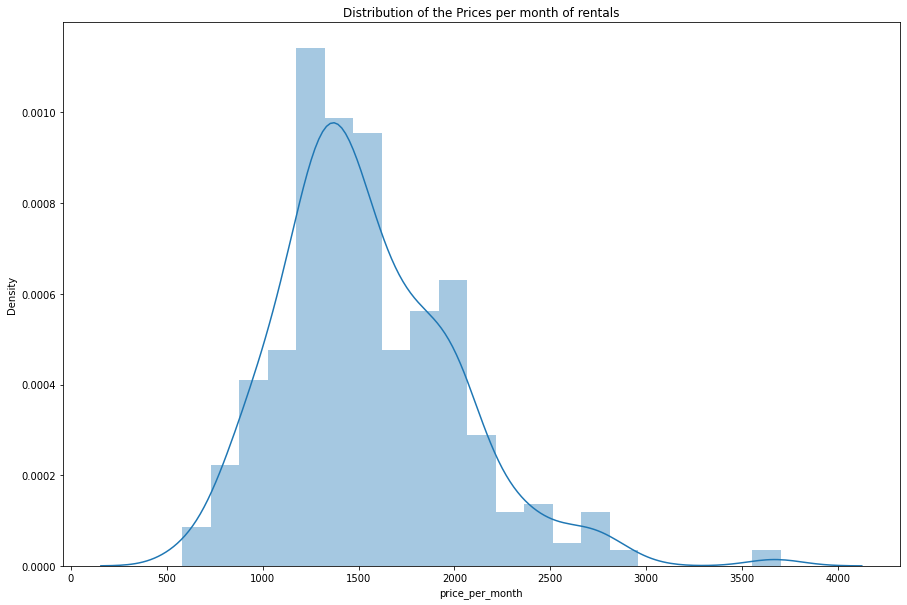

In [ ]:
#Exploring the data by using seaborn:
#Understanding the distribution of the 
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.ylabel('Density')
plt.title("Distribution of the Prices per month of rentals")
seabornInstance.distplot(Galway_Rentals['price_per_month'])

In [ ]:
#Machine Learning Pipeline (2)
#Understanding the types of data in the data set:
Galway_Rentals.dtypes

price_per_month           int64
distance_eyre_square    float64
distance_salthill       float64
distance_nuig           float64
distance_gmit           float64
num_bedrooms              int64
num_bathrooms             int64
type                     object
ber                      object
balcony                  object
floor                    object
heating                  object
dtype: object

In [ ]:
#We can see that the data is clearly divided into two types: 1)Continous; 2)categorical
#We have to identify the Categorical data first:
from sklearn.compose import make_column_selector as selector
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(Galway_Rentals)
categorical_columns

['type', 'ber', 'balcony', 'floor', 'heating']

In [ ]:
#To deal with the categorical data we will perform encoding of the data , so as to feed it into the ML Model
#I will isolate the categorical data into a data frame to understand the behaviour of the data:
data_categorical = Galway_Rentals[categorical_columns]
data_categorical.head()

,type,ber,balcony,floor,heating
0,house,exempt,no,ground,central
1,house,b3,no,ground,central
2,house,c1,no,ground,central
3,apartment,d1,no,second,electric
4,house,c1,no,ground,central


In [ ]:
#Performing Ordinal Encoding on the categorical columns of the data sets. 
#I will be adding the encoded columns into the same Data Frame by creating new columns in the existing data frame. 
encoder = OrdinalEncoder()
Galway_Rentals["type_encoded"] = encoder.fit_transform(Galway_Rentals[["type"]])
Galway_Rentals["ber_enoded"] = encoder.fit_transform(Galway_Rentals[["ber"]])
Galway_Rentals["balcony_encoded"] = encoder.fit_transform(Galway_Rentals[["balcony"]])
Galway_Rentals["floor_encoded"] = encoder.fit_transform(Galway_Rentals[["floor"]])
Galway_Rentals["heating_encoded"] = encoder.fit_transform(Galway_Rentals[["heating"]])

In [ ]:
#Printing the Data Frame to identify if the encoding has been done properly or not:
Galway_Rentals
#Printing the data types of the transformed Data Frame  
print(Galway_Rentals.dtypes)
#We can see that the categorical data has been encoded and has been added as new columns in the Data Frame 

price_per_month           int64
distance_eyre_square    float64
distance_salthill       float64
distance_nuig           float64
distance_gmit           float64
num_bedrooms              int64
num_bathrooms             int64
type                     object
ber                      object
balcony                  object
floor                    object
heating                  object
ber_enoded              float64
type_encoded            float64
balcony_encoded         float64
floor_encoded           float64
heating_encoded         float64
dtype: object


In [ ]:
#Machine Learning Pipeline (3)

#In this step we will be splitting the data into X and y, post which we will be splitting the data sets into training and testing sets. 
#The target variabek is 'price_per_month', that is why I will be isolating it into the variable 'y'. 
#The independent variables are the rest, which is why I will be isolating them into the variable 'X'
#Dropping all the categorical values from the data set all while retainig the encoded variables. 
X=Galway_Rentals.drop(['price_per_month','type','ber','balcony','floor','heating'],axis=1)
y=Galway_Rentals['price_per_month']

#Now that we have divided the data set into X(Independent variables) and y (target variable), we will split it into train and test data sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

#I am splitting the data at this point so it can be used in both the models, without having to work on the data anymore. 

In [ ]:
#Machine Learning Pipeline (4)
#In the below code, I will be constructing the 1st Model. 
#I have used the Linear Regression to create the 1st Regression Model. 

#I am creating an object of Linear Regression class in the below code:
#I am naming the model, Linear_Regression_Model
Linear_Regression_Model = LinearRegression()
#I am fitting the training data into the Linear Regression Model 
Linear_Regression_Model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#In the below code, I am predicitng the dependent variable(target), using the Linar Regression Model
#Linear_Regression_Model
y_pred_LR = Linear_Regression_Model.predict(X_test)

In [ ]:
#Evaluating the Linear_Regression_Model
#I am carrying out a cursory evaluation of the Regression Model, to understand how it has behaved. 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_LR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_LR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)))

print(r2_score(y_test, y_pred_LR))

Mean Absolute Error: 201.5118289857417
Mean Squared Error: 74882.2848460571
Root Mean Squared Error: 273.64627687227375
0.6959867808870647


Feature: 0, Score: -124.23358
Feature: 1, Score: -21.90578
Feature: 2, Score: 44.37617
Feature: 3, Score: 20.15264
Feature: 4, Score: 270.24391
Feature: 5, Score: 138.73263
Feature: 6, Score: -6.83312
Feature: 7, Score: -28.74258
Feature: 8, Score: 5.12282
Feature: 9, Score: 63.65060
Feature: 10, Score: -38.90225


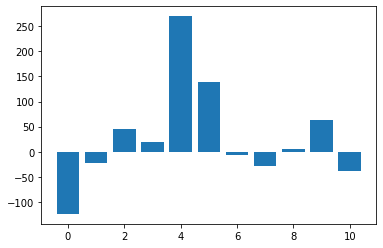

In [ ]:
#To understand which features have affected the model creation, I have plotted the importance of each of the features.
#I have stored the coeffficients of the Model in the variable, 'importance'. 
importance = Linear_Regression_Model.coef_

#I am printing the importance of each of the features. 
for a,b in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (a,b))
 
#Plotting the importance of features
plt.bar([i for i in range(len(importance))], importance)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


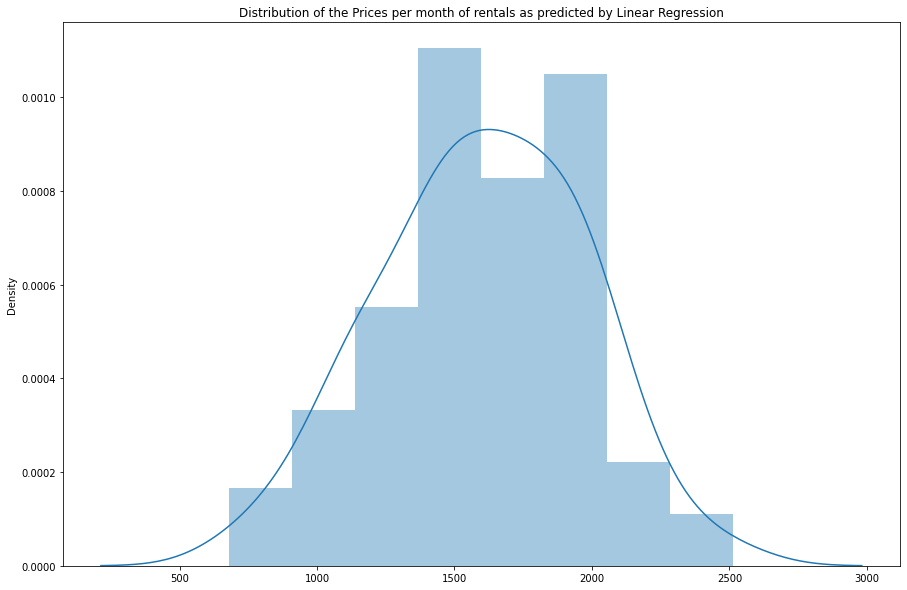

In [ ]:
#Exploring the data by using seaborn:
#Understanding the distribution of the 
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.ylabel('Density')
plt.title("Distribution of the Prices per month of rentals as predicted by Linear Regression")
seabornInstance.distplot(y_pred_LR)

Mean Absolute Error: 236.03481012658227
Mean Squared Error: 86845.99129746835
Root Mean Squared Error: 294.6964392344576
0.6474155478071323


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


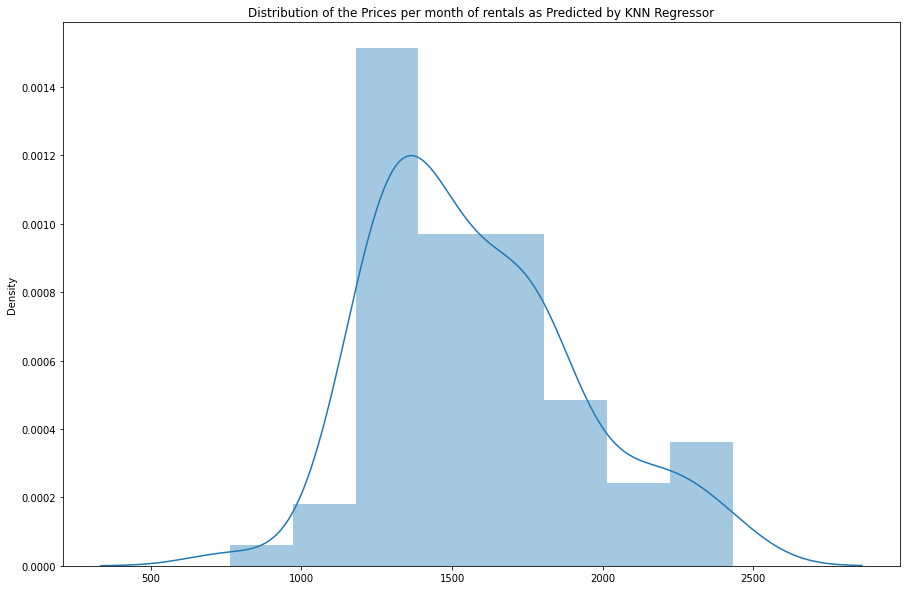

In [ ]:
#Machine Learning Pipeline (5)
#KNN

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=4)
neigh.fit(X_train, y_train)
y_pred_knn=neigh.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

print(r2_score(y_test, y_pred_knn))

#Exploring the data by using seaborn:
#Understanding the distribution of the 
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.ylabel('Density')
plt.title("Distribution of the Prices per month of rentals as Predicted by KNN Regressor")
seabornInstance.distplot(y_pred_knn)

In [ ]:
#X=X.to_numpy()
X
#y=y.to_numpy()
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
y_predicted = poly_reg_model.predict(poly_features)
y_predicted


#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(r2_score(y_test, y_predicted.reshape(-1, 1)))

In [ ]:
features = PolynomialFeatures(degree=1)
X_train_transformed = features.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_transformed, y_train)
X_test_transformed = features.fit_transform(X_test)

train_pred = model.predict(X_train_transformed)
rmse_poly_4_train = metrics.mean_squared_error(y_train, train_pred, squared = False)
print("Train RMSE for Polynonial Regression of degree 4 is {}.".format(rmse_poly_4_train))

test_pred = model.predict(X_test_transformed)
rmse_poly_4 = metrics.mean_squared_error(y_test, test_pred, squared = False)
print("Test RMSE for Polynonial Regression of degree 4 is {}.".format(rmse_poly_4))

print(r2_score(y_test, test_pred))

Train RMSE for Polynonial Regression of degree 4 is 285.6925871670851.
Test RMSE for Polynonial Regression of degree 4 is 273.64627687227375.
0.6959867808870646


In [ ]:
X=Galway_Rentals.drop(['price_per_month','type','ber','balcony','floor','heating'],axis=1)
y=Galway_Rentals['price_per_month']

#Now that we have divided the data set into X(Independent variables) and y (target variable), we will split it into train and test data sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Linear_Regression_Model = LinearRegression()
#I am fitting the training data into the Linear Regression Model 
Linear_Regression_Model.fit(X_train,y_train)
y_pred = Linear_Regression_Model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(r2_score(y_test, y_pred))


#from sklearn.neighbors import KNeighborsRegressor
#neigh = KNeighborsRegressor(n_neighbors=4)
#neigh.fit(X_train, y_train)
#y_pred_knn=neigh.predict(X_test)

#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

#print(r2_score(y_test, y_pred))





Mean Absolute Error: 241.687209150513
Mean Squared Error: 110471.29879804423
Root Mean Squared Error: 332.37222928223747
0.588742498027594
